In [86]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [87]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-04-12-13-38-22']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [88]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:00<00:00, 51372.80it/s]


,Self_Play/Returns,Self_Play/Mean_Timesteps,Self_Play/Mean_Discounted_Return,max_Self_Play/Mean_Discounted_Return,Training/Value_Simularities,grad_steps,Evaluation/Entropies,Evaluation/Mean_Returns,Self_Play/Total_Timesteps,Self_Play/Discounted_Return,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'bins': [-21, -20.90625, -20.8125, -20.71875,...",17.833333,-17.833334,-15.333333,1.807252e-01,116,"{'bins': [-0.24037832021713257, -0.22475332021...",-15,107,"{'bins': [-21, -20.90625, -20.8125, -20.71875,...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
1,"{'bins': [-35, -34.71875, -34.4375, -34.15625,...",23.166667,-23.166666,-19.833334,1.476143e-01,116,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-15,139,"{'bins': [-35, -34.71875, -34.4375, -34.15625,...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
2,"{'bins': [-32, -31.765625, -31.53125, -31.2968...",23.333333,-23.333334,-17.833334,2.052454e-15,116,"{'bins': [-0.024757951498031616, -0.0091329514...",-17,140,"{'bins': [-32, -31.765625, -31.53125, -31.2968...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
3,"{'bins': [-17, -16.96875, -16.9375, -16.90625,...",15.666667,-15.666667,-15.000000,2.617833e-01,116,"{'bins': [-0.40754610300064087, -0.39192110300...",-15,94,"{'_type': 'histogram', 'values': [2, 0, 0, 0, ...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
4,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",21.000000,-21.000000,-15.333333,3.585178e-02,116,"{'bins': [-0.11435949802398682, -0.09873449802...",-15,126,"{'bins': [-25, -24.84375, -24.6875, -24.53125,...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
5,"{'_type': 'histogram', 'values': [2, 0, 0, 0, ...",28.166667,-28.166666,-28.166666,8.912282e-01,116,"{'bins': [0.007314562797546387, 0.022939562797...",-15,169,"{'bins': [-32, -31.84375, -31.6875, -31.53125,...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
6,"{'bins': [-21, -20.90625, -20.8125, -20.71875,...",18.000000,-18.000000,-15.000000,1.316279e-01,116,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-15,108,"{'bins': [-21, -20.90625, -20.8125, -20.71875,...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
7,"{'bins': [-27, -26.84375, -26.6875, -26.53125,...",21.333333,-21.333334,-16.833334,3.318837e-01,116,"{'bins': [-0.13587826490402222, -0.12025326490...",-15,128,"{'bins': [-27, -26.84375, -26.6875, -26.53125,...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
8,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",100.000000,-133.000000,-100.000000,9.679452e-01,116,"{'bins': [0.4234695434570313, 0.43909454345703...",-100,600,"{'bins': [-298, -294.90625, -291.8125, -288.71...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
9,"{'bins': [-20, -19.921875, -19.84375, -19.7656...",17.833333,-17.833334,-14.833333,3.193452e-01,116,"{'bins': [-0.348658949136734, -0.3330339491367...",-15,107,"{'bins': [-20, -19.921875, -19.84375, -19.7656...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity


In [89]:
df.columns

Index(['Self_Play/Returns', 'Self_Play/Mean_Timesteps',
       'Self_Play/Mean_Discounted_Return',
       'max_Self_Play/Mean_Discounted_Return', 'Training/Value_Simularities',
       'grad_steps', 'Evaluation/Entropies', 'Evaluation/Mean_Returns',
       'Self_Play/Total_Timesteps', 'Self_Play/Discounted_Return',
       'Self_Play/Timesteps', 'Training/Value_loss',
       'Training/Value_and_Policy_loss',
       'Self_Play/Total_Mean_Discounted_Return',
       'Training/Regularization_loss', 'Evaluation/Returns',
       'Self_Play/Entropies', 'Self_Play/Min_Return', 'Self_Play/Mean_Entropy',
       'Training/Replay_Buffer_Size',
       'max_Evaluation/Mean_Discounted_Returns_step', '_runtime', '_timestamp',
       'Evaluation/Timesteps', 'Self_Play/Max_Return', 'Self_Play/Mean_Return',
       'Training/Learning_Rate', 'Evaluation/Mean_Entropy',
       'Self_Play/EMA_Discounted_Return', 'Evaluation/Discounted_Returns',
       'max_Self_Play/Mean_Discounted_Return_step', '_step', 'episo

In [90]:
df.discount_factor.unique()


array([1])

In [91]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

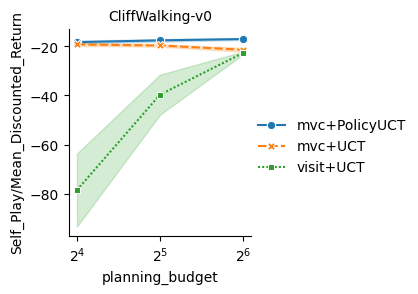

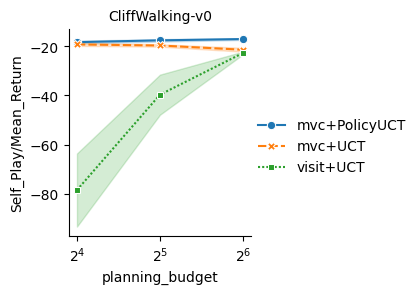

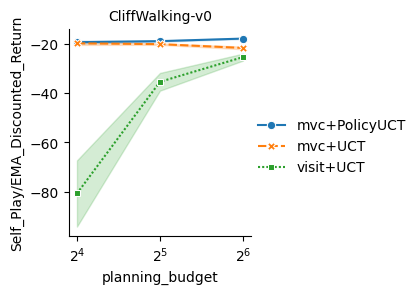

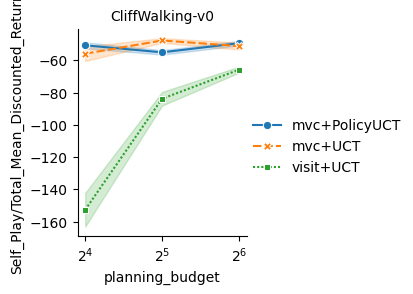

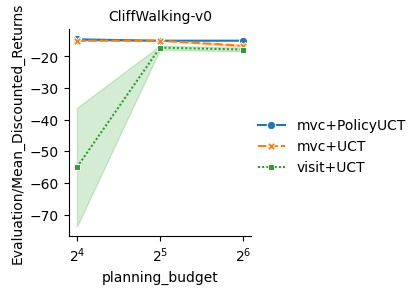

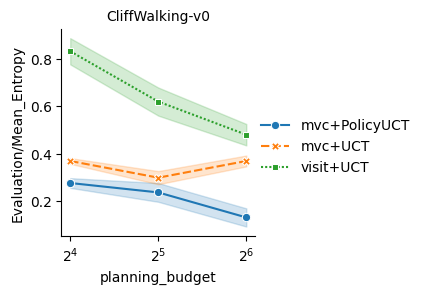

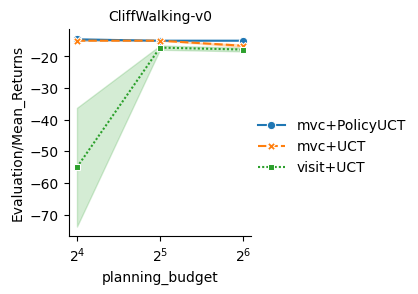

In [92]:



df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']


metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]


estimator = "mean"
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(df, col="env_description",sharex=True, sharey=False)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    for ax in g.axes.flatten():
        ax.set_xscale('log', base=2)

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()

    # Set the titles for each subplot for clarity
    g.set_titles("{col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()

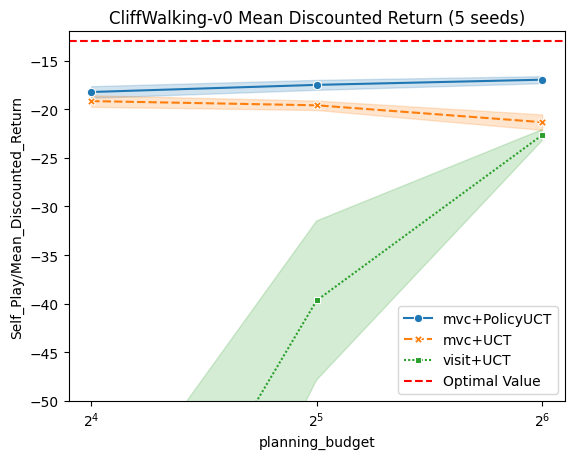

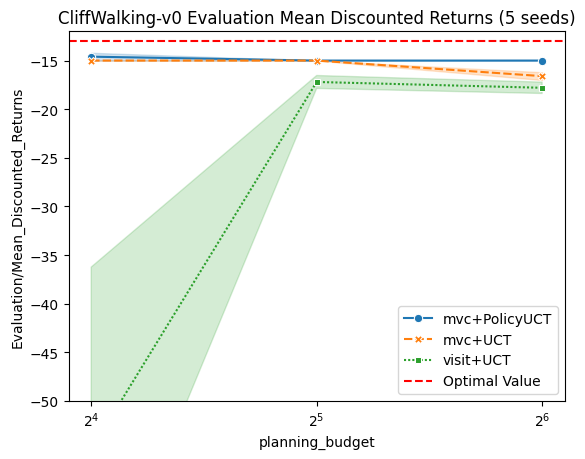

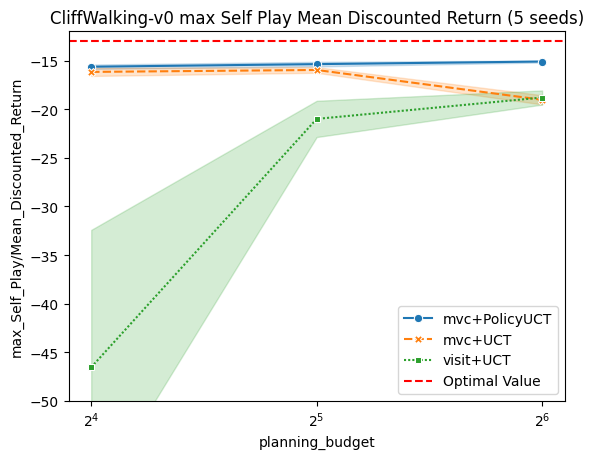

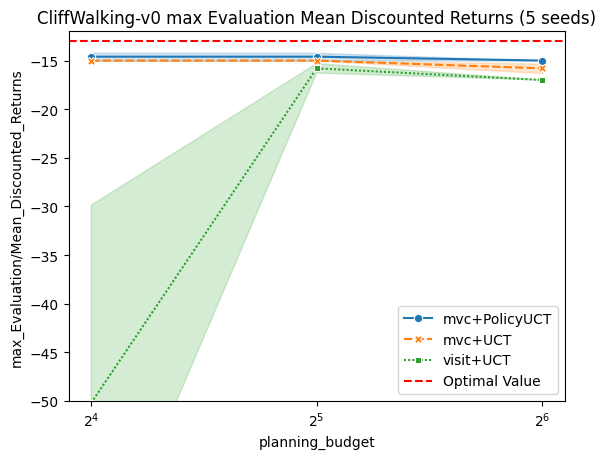

In [99]:

env_description = "CliffWalking-v0"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns",
           "max_Self_Play/Mean_Discounted_Return", "max_Evaluation/Mean_Discounted_Returns"
           ]
# calcualte number of datapoints for each policy_combination and x_metric combination
all_seeds = df.groupby(["policy_combination", x_metric]).size()
assert all_seeds.min() == all_seeds.max(), "Number of seeds is not consistent across policy_combinations and x_metric values"
n_seeds = all_seeds.min()

# plot metric vs x_metric for each policy combination
estimator = "mean"
for metric in metrics:

    # Create a line plot with confidence intervals
    sns.lineplot(data=df,
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    plt.axhline(optimum_value, color='r', linestyle='--', label='Optimal Value')
    # Customize the plot with titles and labels
    # count the number in each group
    plt.title(f'{env_description} {name_fn(metric)} ({n_seeds} seeds)')
    # set range of y-axis
    plt.ylim(-50, -12)
    # add line for optimal value

    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(metric)
    plt.gca().set_xscale('log', base=2)
    plt.legend(loc='lower right')

    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_{env_description}_{estimator}.pdf')

    # Show the plot
    plt.show()